$\renewcommand{\ge}{\geqslant}$ $\renewcommand{\le}{\leqslant} \renewcommand{\phi}{\varphi} \renewcommand{\epsilon}{\varepsilon} \DeclareMathOperator{\St}{\mathop{St}} \DeclareMathOperator{\Orb}{\mathop{Orb}} \DeclareMathOperator{\ord}{\mathop{ord}}$
# Практическая работа №2: Исследование задач о раскрасках
---

## Цель работы
Сформировать представление о задачах о раскрасках, выработать умение использования леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения
Пусть $G$ — группа преобразований множества $X$. Введём бинарное отношение $\rho \subseteq X \times X$: $\forall x_1, x_2 \in X: (x_1, x_2) \in \rho \iff \exists g \in G: x_1 = g(x_2)$. Можно показать, что $\rho$ является отношением эквивалентности: всегда существует $g \in G: x = g(x)$ (нейтральный элемент группы преобразований), если $g \in G: x_1 = g(x_2)$, то $g^{-1} \in G,$ и $x_2 = g^{-1}(x_1)$ (обратимость элементов группы), наконец, если $x_1 = g_1(x_2), x_2 = g_2(x_3) \Rightarrow x_1 = g_1(g_2(x_3)) = (g_2 \circ g_1)(x_3)$ (замкнутость операции композиции в группе преобразований).

Класс эквивалентности по $\rho$, содержащий элемент $x \in X$ — **орбита $x$**. Количество элементов в орбите — длина орбиты. Обозначают орбиту $\Orb(x)$ или $G_x$.

**Стабилизатор $x \in X$ ($\St(x)$)** — множество $\left\{ g \in G \left| g(x) = x \right. \right\}$.

Будем обозначать $N(g)$ количество точек, перешедших в себя же под действием элемента $g \in G$.

**_Свойства орбит и стабилизаторов:_**
* $\St(x) \unlhd G \forall x \in X$
* $\sum\limits_{x \in X}\left| \St(x) \right| = \sum\limits_{g \in G}N(g)$
* $\left|\Orb(x)\right| = \cfrac{|G|}{|\St(x)|}$ 

_**Лемма Бёрнсайда:** Количество орбит действия группы $G$ на множестве $X$ равно $\cfrac{1}{|G|}\sum\limits_{g \in G} N(g)$_

_Доказательство:_
Пусть количество орбит действия $G$ на $X$ равно $r(\Orb(x))$. В силу того, что все орбиты равномощны (свойство классов эквивалентности), имеем
$\sum\limits_{x \in X} \cfrac{1}{|\Orb(x)|} = \cfrac{1}{n} \cdot n + \cfrac{1}{n} \cdot n + \ldots = 1 + 1 + \ldots = r(\Orb(x))$, где $n$ — количество элементов на каждой орбите.

В то же время в силу свойства 3 $\sum\limits_{x \in X}\cfrac{1}{|\Orb(x)|} = \sum\limits_{x \in X}\cfrac{|\St(x)|}{|G|}$, что равно $\cfrac{1}{|G|}\sum\limits_{x \in X}|\St(x)|$ и по свойству 2 равно $\cfrac{1}{|G|}\sum\limits_{g \in G}N(g)$. Имеем $r(\Orb(x)) = \cfrac{1}{|G|}\sum\limits_{g \in G}N(g)$, _q.e.d._

Лемма Бёрнсайда полезна при решении задач о раскрасках. Задачи о раскрасках в общем случае выглядят так: есть некое множество объектов $M$. Требуется найти количество различных раскрасок элементов множества, если раскраски, получаемые друг из друга разрешёнными преобразованиями, считаются совпадающими. То есть в качестве множества $X$ выступает множество всех возможных раскрасок, а в качестве группы $G$ — группа преобразований раскрасок. Каждый элемент группы $G$ в свою очередь вытекает из разрешённой перестановки множества $M$. Легко видеть, что ответом к задаче будет как раз-таки количество орбит действия $G$ на $X$, поскольку элементы, расположенные на одной орбите, в рамках задачи неразличимы.

## Постановка задачи
Аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать. 

**Вариант 21.** Круг разбит на 231 сектор, каждый из которых покрашен в один из 6 цветов. Сколькими способами можно составить такую мозаику (с точностью до поворотов круга)?

Порядок выполнения работы следующий:
1. Аналитически решить задачу о раскрасках для заданного варианта. Все умозаключения в ходе решения обосновать и содержательно проинтерпретировать.
2. Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру. Продемонстрировать работу функции на нескольких примерах. Сделать выводы.
3. Дополнительное необязательное задание: для заданного варианта решить задачу в общем виде.

## Выполнение работы
В рамках выполнения пункта 1 работы была решена задача о раскрасках. Условие приведено в разделе "Постановка задачи". Ход решения представлен ниже.

Представим, что сектора круга последовательно пронумерованы числами от $0$ до $230$. В условиях задачи группу преобразований раскрасок можно найти сразу, поскольку она состоит только из поворотов: $G = \{ id = \sigma^0; \sigma; \sigma^2; \ldots; \sigma^{230} \}$, где $\sigma$ соответствует такому повороту круга, что сектор $0$ переходит в сектор $1$, $1$ — в $2$ и т.д. Соответственно, $|G| = 231$.

Осталось найти количество раскрасок, переходящих в себя под действием любого из этих преобразований, причём желательно без вычисления каждого преобразования в циклическом виде. Заметим, что преобразование $\sigma^k$ применительно к секторам круга увеличивает порядковые номера всех секторов на $k$ по модулю $231$. Если порядок такого поворота $n$, то поворот $n$ раз на $k$ секторов (т.е. прибавление $kn$) равносильно прибавлению $231$ целое минимально возможное для данного $k$ число раз (по определению порядок подстановки — минимальная натуральная степень, возведение подстановки в которую превращает её в тождественное преобразование). Короче говоря, для каждого $k \in \mathbb{Z} \cap [0; 230]$ надо найти минимальное $n$, для которого выполнено $a_0 + kn = a_0 \mod 231$, или же просто $kn = 0 \mod 231$. Число $n$ является порядком подстановки $\sigma^k$, значит, его можно трактовать как длину циклов, на которые разбивается эта подстановка. По длине цикла подстановки применительно к секторам легко вычисляется количество раскрасок, которые переходят в себя при этой подстановке, что нам и требуется.

Заметим дополнительно, что при $kn = 0 \mod 231$ по свойству делимости следует: если $k$ и $231$ взаимно просты, то $n$ должно быть кратно $231$. Так как мы ищем минимальное $n$, то при $D(k, 231) = 1$ ($D(a,b)$ — наибольший общий делитель чисел) сразу $n = \ord(\sigma^k) = 231$, соответственно, запись такой подстановки в циклическом виде имеет единственный цикл из $231$ элемента. Примеры таких подстановок: $\sigma = (0, 1, 2, \ldots, 230)$; $\sigma^2 = (0, 2, 4, \ldots, 230, 1, 3, \ldots, 229)$. 

При $D(k, 231) \ne 1$ $n = \frac{231}{D(k, 231)}$; количество же элементов в цикле равно $D(k, 231)$. Можно вычислить такие $k$ и соответсвующие им $n$. С учётом $231 = 3 \cdot 7 \cdot 11$:
* $k = 0: n = 1 \Rightarrow 231$ цикл.
* $k$ кратно $77:$ 2 значения ($231/77 - 1$ — за исключением уже кратного 231), $n = 3 \Rightarrow 77$ циклов.
* $k$ кратно $33:$ 6 значений (за исключением уже кратного 231), $n = 7 \Rightarrow 33$ цикла.
* $k$ кратно $21:$ 10 значений (за исключением уже кратного 231), $n = 11 \Rightarrow 21$ цикл.
* $k$ кратно $11: 20 - 2 - 6 = 12$ значений (за исключением уже кратных 33 или 77), $n = 21 \Rightarrow 11$ циклов.
* $k$ кратно $7: 32 - 10 - 2 = 20$ значений (за исключением уже кратных 21 или 77), $n = 33 \Rightarrow 7$ циклов.
* $k$ кратно $3: 76 - 6 - 10 = 60$ значений (за исключением уже кратных 33 или 21), $n = 77 \Rightarrow 3$ цикла.

Примеры таких подстановок: $\sigma^3 = (0, 3, 6, \ldots, 228)(1, 4, 7, \ldots, 229)(2, 5, 8, \ldots, 230)$; $\sigma^6 = (0, 6, \ldots, 228, 3, \ldots, 225)(1, 7, \ldots, 229, 4, \ldots, 226)(2, 8, \ldots, 230, 5, \ldots, 227)$.

Аналитическое решение заканчивается вычислением получившегося значения: $\cfrac{1}{231}\left( 6^{231} + 2 \cdot 6^{77} + 6 \cdot 6^{33} + 10 \cdot 6^{21} + 12 \cdot 6^{11} + 20 \cdot 6^{7} + 60 \cdot 6^{3} + 120 \cdot 6^{1} \right)$.

Если предположить, что у нас есть программируемый калькулятор, можно не вычислять количество слагаемых вида $6^x$ для каждого $x$. Достаточно сказать: так как всего 6 цветов, количество идентичных раскрасок в каждом случае равно $6^{D(231, k)}$ (цвета всех секторов одинаковы в рамках одного цикла).

Код, вычисляющий ответ двумя способами и производящий проверку ответа на правдоподобность, приведён ниже.

In [52]:
from math import gcd

analytical = 6 ** 231 + 2 * (6 ** 77) + 6 * (6 ** 33) + 10 * (6 ** 21) + 12 * (6 ** 11) + 20 * (6 ** 7) + \
            60 * (6 ** 3) + (231 - 1 - 2 - 6 - 10 - 12 - 20 - 60)* 6

automatical = 0
for i in range(1, 232):
    automatical += 6 ** (gcd(231, i))
    
assert automatical == analytical, "Something went wrong!"
assert analytical // 231 < 6 ** 231, "Something went wrong!"
print("Final result is", analytical // 231)

Final result is 2450907149709199834387971447941146147320962980119167014749197808936838853013024708598067466568666187904701252686194540130226589864322369940418865243527584129581365403461395874576


---
В рамках выполнения пункта 2 практической работы было реализовано рисование раскраски круга по её номеру. Номер раскраски удобнее всего представлять как число в системе счисления с основанием, равным количеству цветов. Количество цифр в числе должно быть равно количеству секторов круга. Если цифр в числе меньше, число можно дополнить незначащими нулями, если больше — число надо заменить остатком от деления на количество раскрасок.

Для удобства тестирования код, рисующий графическую раскраску круга по номеру, инкапсулирован в класс. Помимо конструктора, у класса есть метод `draw()`, рисующий графическое представление раскраски на экран, и метод `rotate()`, поворачивающий круг по часовой стрелке на заданное пользователем число секторов.

In [64]:
import random
import numpy as np
from sage.plot.disk import disk

class ColouredCircle:
    def __init__(self, number, colours=6, sectors=231):
        self.sectors = sectors
        
        random.seed()
        self.palette = []
        for _ in range(colours):
            self.palette.append((random.random(),random.random(),random.random()))
        
        number %= colours^sectors
        self.colouring = np.array([0 for _ in np.arange(sectors)], dtype=int)
        for i in np.arange(sectors):
            self.colouring[sectors-i-1] = number % colours
            number //= colours
            if not number: break
        
    def draw(self):
        gr = Graphics()
        for i in np.arange(self.sectors):
            gr += disk( (0.0,0.0), 20, (i*(2*pi)/self.sectors, (i+1)*(2*pi)/self.sectors), rgbcolor=self.palette[self.colouring[i]])
        gr.show(axes=False)
        
    def rotate(self, rotation):
        new_colouring = np.array([0 for _ in np.arange(self.sectors)], dtype=int)
        for i in np.arange(self.sectors):
            new_colouring[(i+rotation) % self.sectors] = self.colouring[i]
        self.colouring = new_colouring    

Проверим написанный класс. В тестовые данные входят:
* Раскраска номер 0 (т.е. все сектора имеют цвет 0);
* Раскраска с номером, который должен отображаться в номер 0 (число $6^{231}$, равное числу всех возможных раскрасок без учёта поворотов, на единицу больше, чем максимальное шестиричное 231-значное число);
* Раскраска номер 1 (первый сектор имеет ненулевой цвет, остальные — нулевой);
* Поворот раскраски номер 1;
* Раскраска номер 8 (два сектора имеют разные ненулевые цвета, остальные — нулевые);
* Поворот раскраски номер 8;
* Случайный номер раскраски.

In [67]:
test_data = [(0, 0), (6^231, 0), (1, 50), (8, 150), (randrange(6^231), 0)]

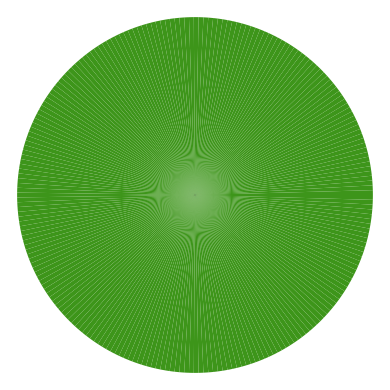

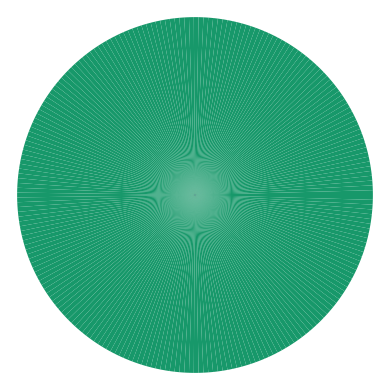

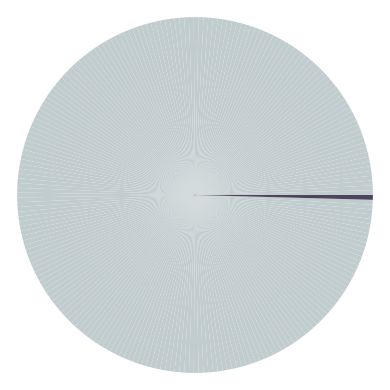

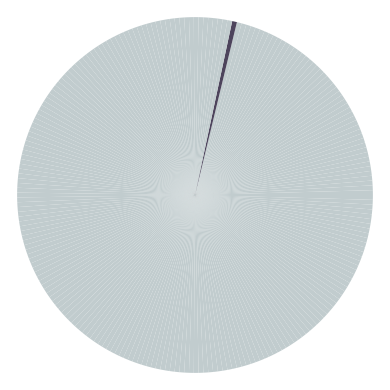

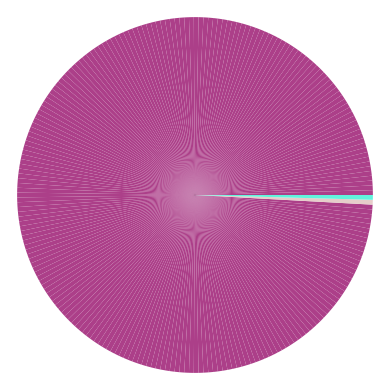

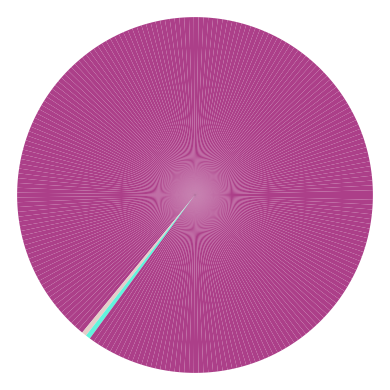

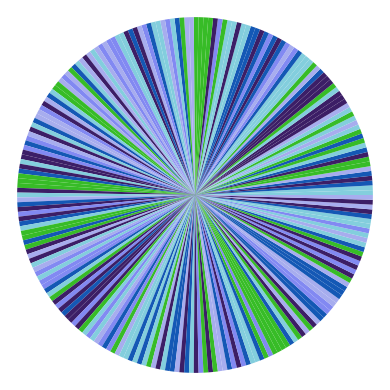

In [68]:
for tst in test_data:
    c = ColouredCircle(tst[0])
    c.draw()
    if(tst[1]):
        c.rotate(tst[1])
        c.draw()

Во всех тестовых случаях получен ожидаемый результат. Видимо, функционал для графического отображения раскраски был реализован правильно. Кроме того, стоит заметить, что раскраски, которые получаются друг из друга поворотом, сейчас получаются циклическим сдвигом массива `colouring` присвоенных секторам цветов. В таком представлении как бы двигаются не сектора, а присвоенные им цветовые метки.

---
## Выводы
В ходе выполнения работы была изучена лемма Бёрнсайда, её применимость к задаче о раскрасках. Кроме того, был освоен общий метод решения задач о раскрасках с помощью указанной леммы, были получены навыки использования графического функционала системы SageMath. Результатом работы стали: оформленное решение типовой задачи о раскрасках; реализованный на языке системы SageMath класс, представляющий раскраску круга.